<a href="https://colab.research.google.com/github/ktonon0401/AI-training/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 8.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=5774b023b0c8dc9996a838408d098c903928883e3d63a9efb580bb487991c7a3
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
#07550755

7.5


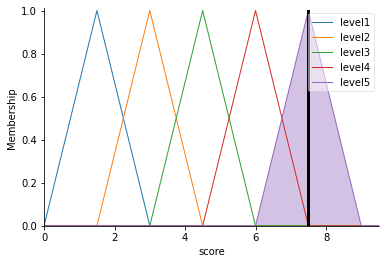

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

taste = ctrl.Antecedent(np.arange(1,3,0.5),'taste')
envi = ctrl.Antecedent(np.arange(1,3,0.5),'envi')
budget = ctrl.Antecedent(np.arange(1,3,0.5),'budget')
review = ctrl.Antecedent(np.arange(1,5,0.5),'review')
location = ctrl.Antecedent(np.arange(1,3,0.5),'location')
score = ctrl.Consequent(np.arange(0,10,0.5),'score')
#Tạo membership tự động
taste_level=['less','medium','high']
envi_level=['less','medium','high']
budget_level=['less','medium','high']
review_level=['very_poor','poor','medium','good','very_good']
location_level=['less','medium','high']
taste.automf(names=taste_level)
envi.automf(names=envi_level)
budget.automf(names=budget_level)
review.automf(names=review_level)
location.automf(names=location_level)

#Tạo membership bằng tay
score['level1']=fuzz.trimf(score.universe,[0,1.5,3])
score['level2']=fuzz.trimf(score.universe,[1.5,3,4.5])
score['level3']=fuzz.trimf(score.universe,[3,4.5,6])
score['level4']=fuzz.trimf(score.universe,[4.5,6,7.5])
score['level5']=fuzz.trimf(score.universe,[6,7.5,9])

rule1=ctrl.Rule(taste['less']&envi['less'],score['level1'])
rule2=ctrl.Rule(taste['medium']&envi['less'],score['level2'])
rule3=ctrl.Rule(taste['high']&envi['less'],score['level3'])
rule4=ctrl.Rule(taste['less']&envi['medium'],score['level2'])
rule5=ctrl.Rule(taste['medium']&envi['medium'],score['level3'])
rule6=ctrl.Rule(taste['high']&envi['medium'],score['level4'])
rule7=ctrl.Rule(taste['less']&envi['high'],score['level3'])
rule8=ctrl.Rule(taste['medium']&envi['high'],score['level4'])
rule9=ctrl.Rule(taste['high']&envi['high'],score['level5'])

rule10=ctrl.Rule(taste['less']&budget['less'],score['level1'])
rule11=ctrl.Rule(taste['medium']&budget['less'],score['level2'])
rule12=ctrl.Rule(taste['high']&budget['less'],score['level3'])
rule13=ctrl.Rule(taste['less']&budget['medium'],score['level2'])
rule14=ctrl.Rule(taste['medium']&budget['medium'],score['level3'])
rule15=ctrl.Rule(taste['high']&budget['medium'],score['level4'])
rule16=ctrl.Rule(taste['less']&budget['high'],score['level3'])
rule17=ctrl.Rule(taste['medium']&budget['high'],score['level4'])
rule18=ctrl.Rule(taste['high']&budget['high'],score['level5'])

rule19=ctrl.Rule(taste['less']&review['very_poor'],score['level1'])
rule20=ctrl.Rule(taste['less']&review['poor'],score['level1'])
rule21=ctrl.Rule(taste['less']&review['medium'],score['level2'])
rule22=ctrl.Rule(taste['less']&review['good'],score['level3'])
rule23=ctrl.Rule(taste['less']&review['very_good'],score['level4'])
rule24=ctrl.Rule(taste['medium']&review['very_poor'],score['level1'])
rule25=ctrl.Rule(taste['medium']&review['poor'],score['level2'])
rule26=ctrl.Rule(taste['medium']&review['medium'],score['level3'])
rule27=ctrl.Rule(taste['medium']&review['good'],score['level4'])
rule28=ctrl.Rule(taste['medium']&review['very_good'],score['level5'])
rule29=ctrl.Rule(taste['high']&review['very_poor'],score['level2'])
rule30=ctrl.Rule(taste['high']&review['poor'],score['level3'])
rule31=ctrl.Rule(taste['high']&review['medium'],score['level4'])
rule32=ctrl.Rule(taste['high']&review['good'],score['level5'])
rule33=ctrl.Rule(taste['high']&review['very_good'],score['level5'])

rule34=ctrl.Rule(taste['less']&location['less'],score['level1'])
rule35=ctrl.Rule(taste['medium']&location['less'],score['level2'])
rule36=ctrl.Rule(taste['high']&location['less'],score['level3'])
rule37=ctrl.Rule(taste['less']&location['medium'],score['level2'])
rule38=ctrl.Rule(taste['medium']&location['medium'],score['level3'])
rule39=ctrl.Rule(taste['high']&location['medium'],score['level4'])
rule40=ctrl.Rule(taste['less']&location['high'],score['level3'])
rule41=ctrl.Rule(taste['medium']&location['high'],score['level4'])
rule42=ctrl.Rule(taste['high']&location['high'],score['level5'])

rule43=ctrl.Rule(envi['less']&review['very_poor'],score['level1'])
rule44=ctrl.Rule(envi['less']&review['poor'],score['level1'])
rule45=ctrl.Rule(envi['less']&review['medium'],score['level2'])
rule46=ctrl.Rule(envi['less']&review['good'],score['level3'])
rule47=ctrl.Rule(envi['less']&review['very_good'],score['level4'])
rule48=ctrl.Rule(envi['medium']&review['very_poor'],score['level1'])
rule49=ctrl.Rule(envi['medium']&review['poor'],score['level2'])
rule50=ctrl.Rule(envi['medium']&review['medium'],score['level3'])
rule51=ctrl.Rule(envi['medium']&review['good'],score['level4'])
rule52=ctrl.Rule(envi['medium']&review['very_good'],score['level5'])
rule53=ctrl.Rule(envi['high']&review['very_poor'],score['level2'])
rule54=ctrl.Rule(envi['high']&review['poor'],score['level3'])
rule55=ctrl.Rule(envi['high']&review['medium'],score['level4'])
rule56=ctrl.Rule(envi['high']&review['good'],score['level5'])
rule57=ctrl.Rule(envi['high']&review['very_good'],score['level5'])

rule58=ctrl.Rule(envi['less']&budget['less'],score['level1'])
rule59=ctrl.Rule(envi['medium']&budget['less'],score['level2'])
rule60=ctrl.Rule(envi['high']&budget['less'],score['level3'])
rule61=ctrl.Rule(envi['less']&budget['medium'],score['level2'])
rule62=ctrl.Rule(envi['medium']&budget['medium'],score['level3'])
rule63=ctrl.Rule(envi['high']&budget['medium'],score['level4'])
rule64=ctrl.Rule(envi['less']&budget['high'],score['level3'])
rule65=ctrl.Rule(envi['medium']&budget['high'],score['level4'])
rule66=ctrl.Rule(envi['high']&budget['high'],score['level5'])

rule67=ctrl.Rule(envi['less']&location['less'],score['level1'])
rule68=ctrl.Rule(envi['medium']&location['less'],score['level2'])
rule69=ctrl.Rule(envi['high']&location['less'],score['level3'])
rule70=ctrl.Rule(envi['less']&location['medium'],score['level2'])
rule71=ctrl.Rule(envi['medium']&location['medium'],score['level3'])
rule72=ctrl.Rule(envi['high']&location['medium'],score['level4'])
rule73=ctrl.Rule(envi['less']&location['high'],score['level3'])
rule74=ctrl.Rule(envi['medium']&location['high'],score['level4'])
rule75=ctrl.Rule(envi['high']&location['high'],score['level5'])

rule76=ctrl.Rule(budget['less']&location['less'],score['level1'])
rule77=ctrl.Rule(budget['medium']&location['less'],score['level2'])
rule78=ctrl.Rule(budget['high']&location['less'],score['level3'])
rule79=ctrl.Rule(budget['less']&location['medium'],score['level2'])
rule80=ctrl.Rule(budget['medium']&location['medium'],score['level3'])
rule81=ctrl.Rule(budget['high']&location['medium'],score['level4'])
rule82=ctrl.Rule(budget['less']&location['high'],score['level3'])
rule83=ctrl.Rule(budget['medium']&location['high'],score['level4'])
rule84=ctrl.Rule(budget['high']&location['high'],score['level5'])

rule85=ctrl.Rule(budget['less']&review['very_poor'],score['level1'])
rule86=ctrl.Rule(budget['less']&review['poor'],score['level1'])
rule87=ctrl.Rule(budget['less']&review['medium'],score['level2'])
rule88=ctrl.Rule(budget['less']&review['good'],score['level3'])
rule89=ctrl.Rule(budget['less']&review['very_good'],score['level4'])
rule90=ctrl.Rule(budget['medium']&review['very_poor'],score['level1'])
rule91=ctrl.Rule(budget['medium']&review['poor'],score['level2'])
rule92=ctrl.Rule(budget['medium']&review['medium'],score['level3'])
rule93=ctrl.Rule(budget['medium']&review['good'],score['level4'])
rule94=ctrl.Rule(budget['medium']&review['very_good'],score['level5'])
rule95=ctrl.Rule(budget['high']&review['very_poor'],score['level2'])
rule96=ctrl.Rule(budget['high']&review['poor'],score['level3'])
rule97=ctrl.Rule(budget['high']&review['medium'],score['level4'])
rule98=ctrl.Rule(budget['high']&review['good'],score['level5'])
rule99=ctrl.Rule(budget['high']&review['very_good'],score['level5'])

rule100=ctrl.Rule(location['less']&review['very_poor'],score['level1'])
rule101=ctrl.Rule(location['less']&review['poor'],score['level1'])
rule102=ctrl.Rule(location['less']&review['medium'],score['level2'])
rule103=ctrl.Rule(location['less']&review['good'],score['level3'])
rule104=ctrl.Rule(location['less']&review['very_good'],score['level4'])
rule105=ctrl.Rule(location['medium']&review['very_poor'],score['level1'])
rule106=ctrl.Rule(location['medium']&review['poor'],score['level2'])
rule107=ctrl.Rule(location['medium']&review['medium'],score['level3'])
rule108=ctrl.Rule(location['medium']&review['good'],score['level4'])
rule109=ctrl.Rule(location['medium']&review['very_good'],score['level5'])
rule110=ctrl.Rule(location['high']&review['very_poor'],score['level2'])
rule111=ctrl.Rule(location['high']&review['poor'],score['level3'])
rule112=ctrl.Rule(location['high']&review['medium'],score['level4'])
rule113=ctrl.Rule(location['high']&review['good'],score['level5'])
rule114=ctrl.Rule(location['high']&review['very_good'],score['level5'])

# rule1.view()

taste_envi=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9]
taste_budget=[rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18]
taste_review=[rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,
              rule28,rule29,rule30,rule31,rule32,rule33]
taste_location=[rule34,rule35,rule36,rule37,rule38,rule39,rule40,rule41,rule42]
envi_review=[rule43,rule44,rule45,rule46,rule47,rule48,rule49,rule50,rule51,
             rule52,rule53,rule54,rule55,rule56,rule57]
envi_budget=[rule58,rule59,rule60,rule61,rule62,rule63,rule64,rule65,rule66]
envi_location=[rule67,rule68,rule69,rule70,rule71,rule72,rule73,rule74,rule75]
budget_location=[rule76,rule77,rule78,rule79,rule80,rule81,rule81,rule82,rule83,rule84]
budget_review=[rule85,rule86,rule87,rule88,rule89,rule90,rule91,rule92,rule93,
               rule94,rule95,rule96,rule97,rule98,rule99]
location_review=[rule100,rule101,rule102,rule103,rule104,rule105,rule106,rule107,
                 rule108,rule109,rule110,rule111,rule112,rule113,rule114]

rule_list=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,
           rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,
           rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,
           rule32,rule33,rule34,rule35,rule36,rule37,rule38,rule39,rule40,rule41,
           rule42,rule43,rule44,rule45,rule46,rule47,rule48,rule49,rule50,rule51,
           rule52,rule53,rule54,rule55,rule56,rule57,rule58,rule59,rule60,rule61,
           rule62,rule63,rule64,rule65,rule66,rule67,rule68,rule69,rule70,rule71,
           rule72,rule73,rule74,rule75,rule76,rule77,rule78,rule79,rule80,rule81,
           rule81,rule82,rule83,rule84,rule85,rule86,rule87,rule88,rule89,rule90,
           rule91,rule92,rule93,rule94,rule95,rule96,rule97,rule98,rule99,rule100,
           rule101,rule102,rule103,rule104,rule105,rule106,rule107,rule108,rule109,
           rule110,rule111,rule112,rule113,rule114]

score_ctrl = ctrl.ControlSystem(rule_list)
score_out = ctrl.ControlSystemSimulation(score_ctrl)
score_out.input['taste']=3
score_out.input['envi']=3
score_out.input['budget']=3
score_out.input['review']=5
score_out.input['location']=3
score_out.compute()
print(score_out.output['score'])
score.view(sim=score_out)

In [ ]:
#34725337

ValueError: ignored

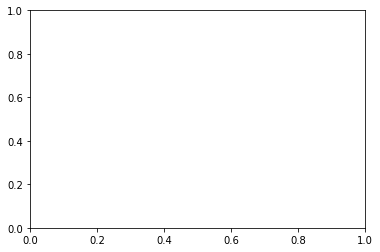

In [14]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

fever=ctrl.Antecedent(np.arange(0,0.3,0.01),'fever')
headache=ctrl.Antecedent(np.arange(0,0.3,0.01),'headache')
nausea=ctrl.Antecedent(np.arange(0,0.3,0.01),'nausea')
vomiting=ctrl.Antecedent(np.arange(0,0.3,0.01),'vomiting')
jaundice=ctrl.Antecedent(np.arange(0,0.3,0.01),'jaundice')
enlarge_liver=ctrl.Antecedent(np.arange(0,0.3,0.01),'enlarge_liver')
joint_pain=ctrl.Antecedent(np.arange(0,0.3,0.01),'joint_pain')
body_weakness=ctrl.Antecedent(np.arange(0,0.3,0.01),'body_weakness')
dizziness=ctrl.Antecedent(np.arange(0,0.3,0.01),'dizziness')
loss_of_appetite=ctrl.Antecedent(np.arange(0,0.3,0.01),'loss_of_appetite')
mp=ctrl.Antecedent(np.arange(0,0.3,0.01),'mp')
conclusion=ctrl.Consequent(np.arange(0,1,0.01),'conclusion')
#Tạo membership tự động
level=['mild','moderate','severe','very_severe']
fever_lv=headache_lv=nausea_lv=vomiting_lv=jaundice_lv=enlarge_liver_lv=level
joint_pain_lv=body_weakness_lv=dizziness_lv=loss_of_appetite_lv=mp_lv=level

fever.automf(names=fever_lv)
headache.automf(names=headache_lv)
nausea.automf(names=nausea_lv)
vomiting.automf(names=vomiting_lv)
jaundice.automf(names=jaundice_lv)
enlarge_liver.automf(names=enlarge_liver_lv)
joint_pain.automf(names=joint_pain_lv)
body_weakness.automf(names=body_weakness_lv)
dizziness.automf(names=dizziness_lv)
loss_of_appetite.automf(names=loss_of_appetite_lv)
mp.automf(names=mp_lv)
# conclusion.automf(names=conclusion_lv)

#Tạo membership bằng tay
# malaria['mild']=fuzz.trimf(malaria.universe,[0.1,0.2,0.3])
# malaria['moderate']=fuzz.trimf(malaria.universe,[0.3,0.45,0.6])
# malaria['severe']=fuzz.trimf(malaria.universe,[0.6,0.7,0.8])
# malaria['very_severe']=fuzz.trimf(malaria.universe,[0.8,0.9,1])
conclusion['mild']=fuzz.trimf(conclusion.universe,[0.1,0.2,0.3])
conclusion['moderate']=fuzz.trimf(conclusion.universe,[0.3,0.45,0.6])
conclusion['severe']=fuzz.trimf(conclusion.universe,[0.6,0.7,0.8])
conclusion['very_severe']=fuzz.trimf(conclusion.universe,[0.8,0.9,1])

rule1 = ctrl.Rule(fever['mild']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['mild']&body_weakness['mild']
                  &dizziness['severe']&loss_of_appetite['mild']&mp['mild']&
                  conclusion['mild'])
rule2 = ctrl.Rule(fever['moderate']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']
                  &dizziness['severe']&loss_of_appetite['moderate']&mp['moderate']&
                  conclusion['moderate'])
rule3 = ctrl.Rule(fever['severe']&headache['moderate']&nausea['mild']&vomiting['mild']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['mild']&body_weakness['severe']
                  &dizziness['severe']&loss_of_appetite['severe']&mp['moderate']&
                  conclusion['severe'])
rule4 = ctrl.Rule(fever['very_severe']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']
                  &dizziness['mild']&loss_of_appetite['mild']&mp['severe']&
                  conclusion['very_severe'])
rule5 = ctrl.Rule(fever['moderate']&headache['mild']&nausea['mild']&vomiting['moderate']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']
                  &dizziness['moderate']&loss_of_appetite['severe']&mp['moderate']&
                  conclusion['moderate'])
rule6 = ctrl.Rule(fever['mild']&headache['moderate']&nausea['moderate']&vomiting['mild']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['mild']&body_weakness['mild']
                  &dizziness['moderate']&loss_of_appetite['mild']&mp['mild']&
                  conclusion['mild'])
rule7 = ctrl.Rule(fever['very_severe']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']
                  &dizziness['mild']&loss_of_appetite['moderate']&mp['severe']&
                  conclusion['very_severe'])
rule8 = ctrl.Rule(fever['very_severe']&headache['severe']&nausea['moderate']&vomiting['severe']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']
                  &dizziness['mild']&loss_of_appetite['mild']&mp['severe']&
                  conclusion['very_severe'])
rule9 = ctrl.Rule(fever['moderate']&headache['mild']&nausea['moderate']&vomiting['moderate']&jaundice['mild']
                  &enlarge_liver['severe']&joint_pain['moderate']&body_weakness['moderate']
                  &dizziness['severe']&loss_of_appetite['moderate']&mp['moderate']&
                  conclusion['moderate'])
rule10 = ctrl.Rule(fever['mild']&headache['mild']&nausea['moderate']&vomiting['moderate']&jaundice['mild']
                  &enlarge_liver['moderate']&joint_pain['mild']&body_weakness['mild']
                  &dizziness['mild']&loss_of_appetite['mild']&mp['mild']&
                  conclusion['mild'])
rule11 = ctrl.Rule(fever['severe']&headache['severe']&nausea['severe']&vomiting['severe']&jaundice['severe']
                  &enlarge_liver['severe']&joint_pain['severe']&body_weakness['very_severe']
                  &dizziness['severe']&loss_of_appetite['severe']&mp['very_severe']&
                  conclusion['very_severe'])
rule12 = ctrl.Rule(fever['moderate']&headache['severe']&nausea['moderate']&vomiting['severe']&jaundice['moderate']
                  &enlarge_liver['severe']&joint_pain['moderate']&body_weakness['severe']
                  &dizziness['moderate']&loss_of_appetite['mild']&mp['moderate']&
                  conclusion['severe'])
rule13 = ctrl.Rule(fever['mild']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['mild']&body_weakness['moderate']
                  &dizziness['mild']&loss_of_appetite['moderate']&mp['moderate']&
                  conclusion['moderate'])
rule14 = ctrl.Rule(fever['severe']&headache['severe']&nausea['moderate']&vomiting['severe']&jaundice['severe']
                  &enlarge_liver['severe']&joint_pain['severe']&body_weakness['moderate']
                  &dizziness['moderate']&loss_of_appetite['moderate']&mp['severe']&
                  conclusion['severe'])
rule15 = ctrl.Rule(fever['mild']&headache['mild']&nausea['mild']&vomiting['moderate']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['mild']&body_weakness['severe']
                  &dizziness['mild']&loss_of_appetite['severe']&mp['moderate']&
                  conclusion['severe'])
rule16 = ctrl.Rule(fever['very_severe']&headache['moderate']&nausea['mild']&vomiting['moderate']&jaundice['severe']
                  &enlarge_liver['moderate']&joint_pain['mild']&body_weakness['very_severe']
                  &dizziness['severe']&loss_of_appetite['mild']&mp['moderate']&
                  conclusion['very_severe'])
rule17 = ctrl.Rule(fever['mild']&headache['very_severe']&nausea['moderate']&vomiting['moderate']&jaundice['mild']
                  &enlarge_liver['moderate']&joint_pain['mild']&body_weakness['moderate']
                  &dizziness['very_severe']&loss_of_appetite['mild']&mp['moderate']&
                  conclusion['very_severe'])
rule18 = ctrl.Rule(fever['moderate']&headache['very_severe']&nausea['very_severe']&vomiting['mild']&jaundice['severe']
                  &enlarge_liver['severe']&joint_pain['moderate']&body_weakness['severe']
                  &dizziness['very_severe']&loss_of_appetite['very_severe']&mp['severe']&
                  conclusion['very_severe'])
rule19 = ctrl.Rule(fever['moderate']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']
                  &dizziness['moderate']&loss_of_appetite['moderate']&mp['moderate']&
                  conclusion['moderate'])
rule20 = ctrl.Rule(fever['very_severe']&headache['severe']&nausea['severe']&vomiting['severe']&jaundice['severe']
                  &enlarge_liver['severe']&joint_pain['severe']&body_weakness['severe']
                  &dizziness['severe']&loss_of_appetite['severe']&mp['moderate']&
                  conclusion['very_severe'])


rule1.view()
conclusion_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,
                                   rule9,rule10,rule11,rule12,rule13,rule14,rule15,
                                   rule16,rule17,rule18,rule19,rule20])
mlr = ctrl.ControlSystemSimulation(conclusion_ctrl)
mlr.input['fever']=0.3
mlr.input['headache']=0.3
mlr.input['nausea']=0.3
mlr.input['vomiting']=0.3
mlr.input['jaundice']=0.3
mlr.input['enlarge_liver']=0.3
mlr.input['joint_pain']=0.3
mlr.input['body_weakness']=0.3
mlr.input['dizziness']=0.3
mlr.input['loss_of_appetite']=0.3
mlr.input['mp']=0.3
mlr.compute()
print(mlr.output['conclusion'])
conclusion.view(sim=mlr)